# Exercise 7
# SVM and Naive Bayes

## <b>Problem Description</b>
To perform classification using NaiveBayes and SVM on Iris dataset. Display the confusion matrix for the various classifiers. Analyze the performance of SVM for different kernel functions. Represent the results of the classification in terms of precision and recall using graphs.

### Step 1

Import the required packages<br>
We will using numpy and pandas to store the data values, sklearn to fit and evaluate the model and matplotlib to plot

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

c:\users\balaj\appdata\local\programs\python\python36\python.exe
3.6.2 (v3.6.2:5fd33b5, Jul  8 2017, 04:57:36) [MSC v.1900 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)


In [2]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import numpy as np

### Step 2

Import the iris dataset<br>

In [3]:
df = pd.read_csv('CSV/Iris.csv')
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

### Step 3

We need to convert the target attribute (Species) into numerical datatype to perform classification

In [5]:
print(df.Species.dtype)

if df.Species.dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df.Species.values))
    df.Species = lbl.transform(list(df.Species.values))
    
print(df.Species.dtype)


object
int64


### Step 4

Split into testing and training data sets : We are using 25% of the data for testing and rest 75% for training

In [6]:
Y = df.Species.values
X = df.drop(['Species'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state=30)

### Step 4.1

Fit it into Naive Bayes Classifier and print the confusion matrix

In [7]:
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [8]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[12  0  0]
 [ 0 10  1]
 [ 0  1 14]]


Seaborn matrix

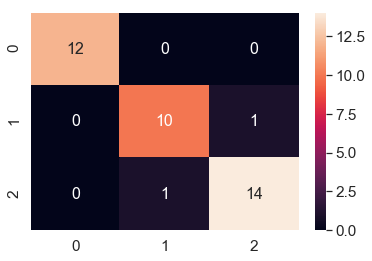

In [9]:
import seaborn as sn
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(con_mat), annot=True,annot_kws={"size": 16})

We fill the missing values with the mean because all of them are numerical values

### Step 4.2

Fit the data into SVM classifier

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.95)
classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


The precision-recall score is 100%<br>
We will add random noise data

In [11]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)

### Step 4.2.1

Linear Kernel

Average precision-recall score: 0.8269230769230771


Text(0,0.5,'Precision')

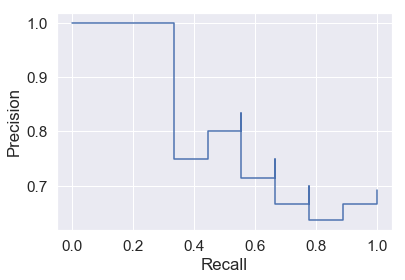

In [12]:
classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Step 4.2.2

Polynomial Kernel

Average precision-recall score: 0.8400673400673402


Text(0,0.5,'Precision')

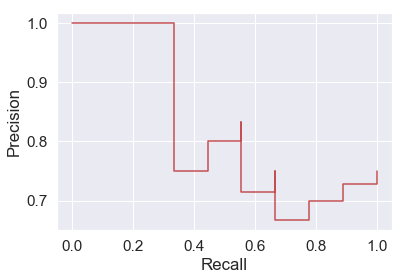

In [13]:
classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Step 4.2.3

RBF kernel

Average precision-recall score: 0.8198523698523699


Text(0,0.5,'Precision')

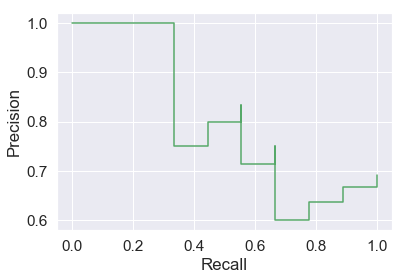

In [14]:
classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')